In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
telco_base_data=pd.read_excel(r"/content/Copy of Telco_customer_churn.xlsx")

In [3]:
telco_base_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
telco_base_data.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [5]:
telco_base_data.drop(columns=['City','CustomerID','Churn Reason','Country','State','Count','Zip Code','CLTV','Lat Long','Latitude','Longitude','Churn Label'],inplace=True)

In [6]:
telco_base_data.describe()

,Tenure Months,Monthly Charges,Churn Value,Churn Score
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.265370,58.699418
std,24.559481,30.090047,0.441561,21.525131
min,0.000000,18.250000,0.000000,5.000000
25%,9.000000,35.500000,0.000000,40.000000
50%,29.000000,70.350000,0.000000,61.000000
75%,55.000000,89.850000,1.000000,75.000000
max,72.000000,118.750000,1.000000,100.000000


In [7]:
telco_base_data.columns.values

array(['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Value', 'Churn Score'], dtype=object)

In [8]:
telco_base_data.shape

(7043, 21)

In [9]:
telco_base_data.dtypes

,0
Gender,object
Senior Citizen,object
Partner,object
Dependents,object
Tenure Months,int64
Phone Service,object
Multiple Lines,object
Internet Service,object
Online Security,object
Online Backup,object


In [10]:
100*telco_base_data['Churn Value'].value_counts()/len(telco_base_data['Churn Value'])

,count
Churn Value,
0,73.463013
1,26.536987


In [11]:
telco_base_data['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,1869


In [12]:
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [14]:
telco_base_data['Total Charges'] = pd.to_numeric(telco_base_data['Total Charges'], errors="coerce")  # Because total charges are in object then we convert into numeric form .
telco_base_data.isnull().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0
Online Backup,0


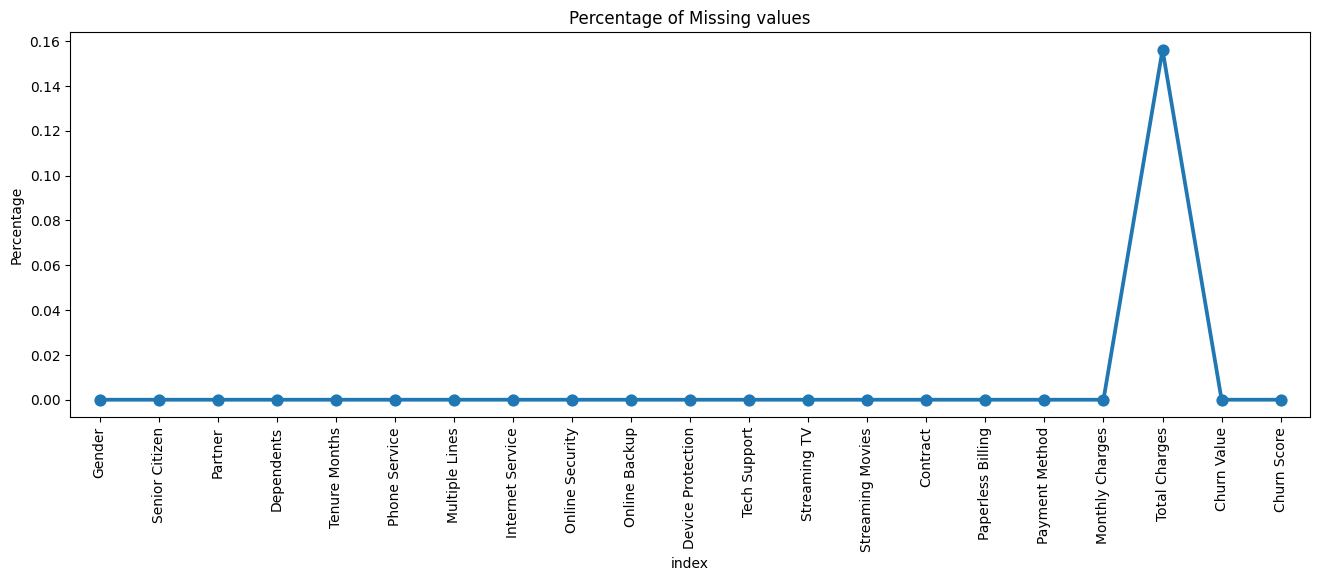

In [15]:
missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=10)
plt.title("Percentage of Missing values")
plt.ylabel('Percentage')
plt.show()

In [16]:
# Data Cleanigs

In [17]:
df1=telco_base_data.copy()

<Axes: >

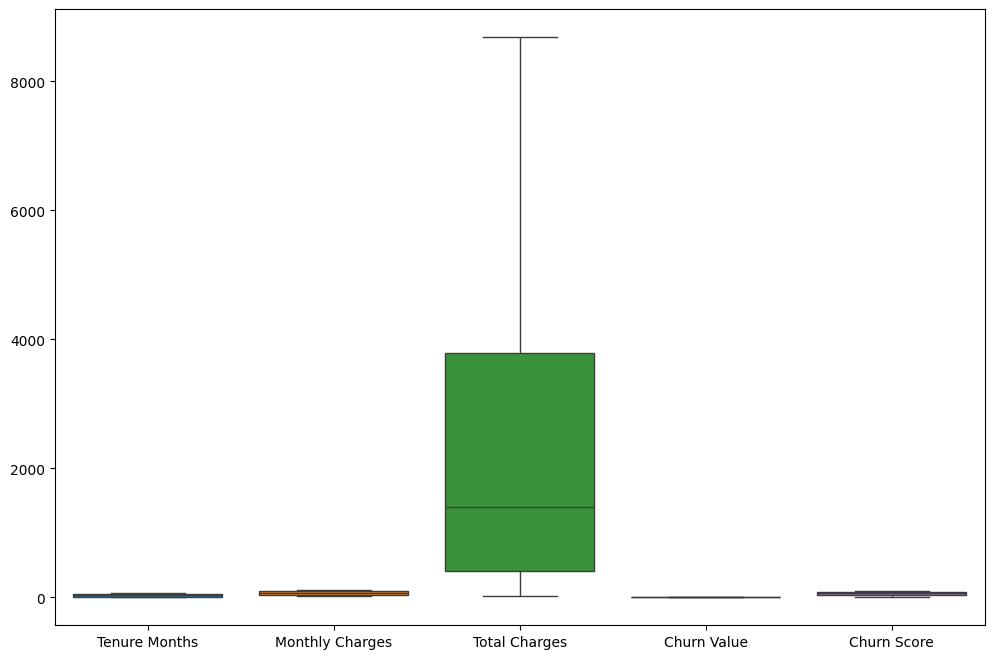

In [18]:
# To check the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

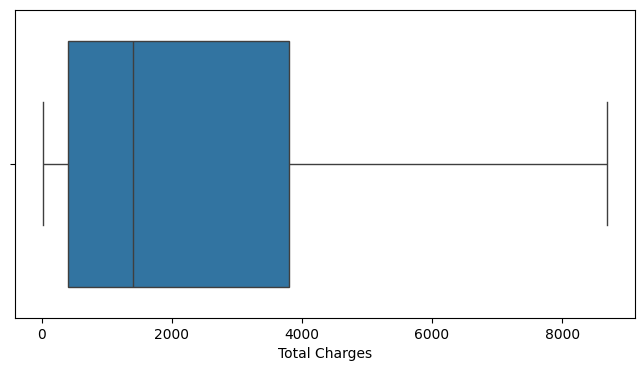

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Total Charges', data=df1)
plt.show()

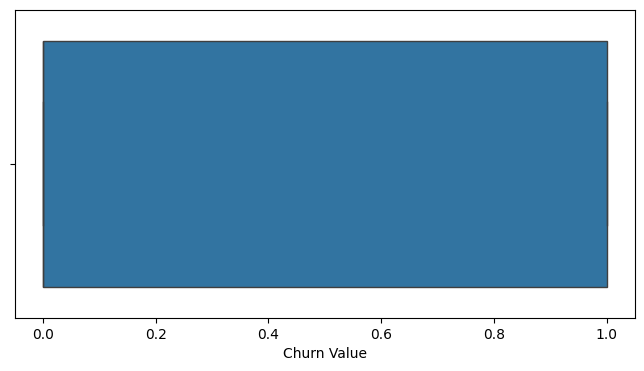

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn Value', data=df1)
plt.show()

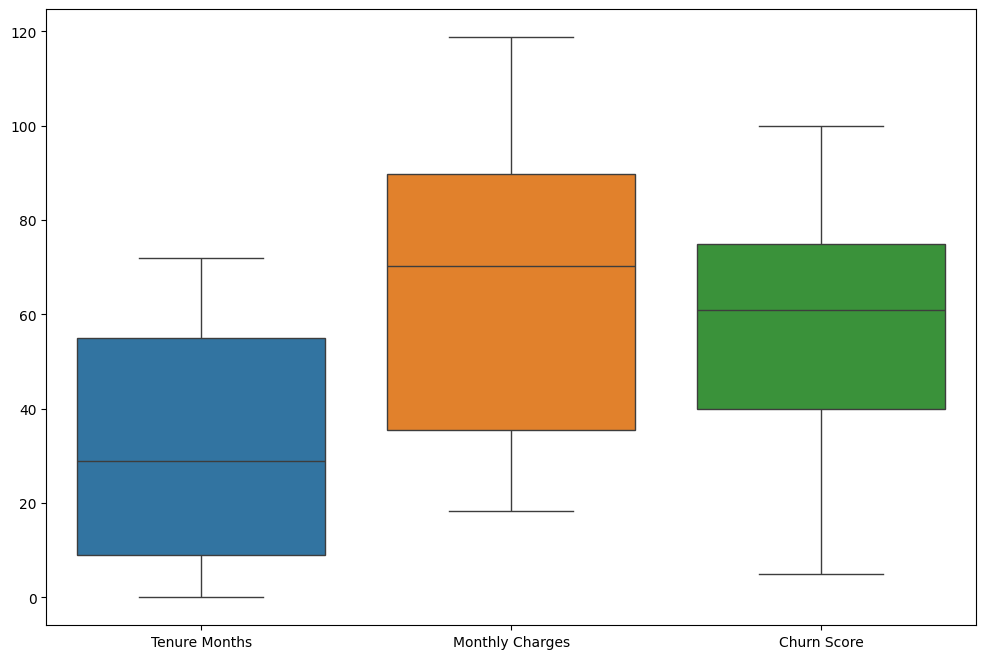

In [21]:
plt.figure(figsize=(12, 8))
remaining_columns = df1.drop(columns=['Total Charges', 'Churn Value'])
sns.boxplot(data=remaining_columns)
plt.show()

<ipython-input-22-8fff96cb6ed5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['Total Charges'], shade=True, color='green')


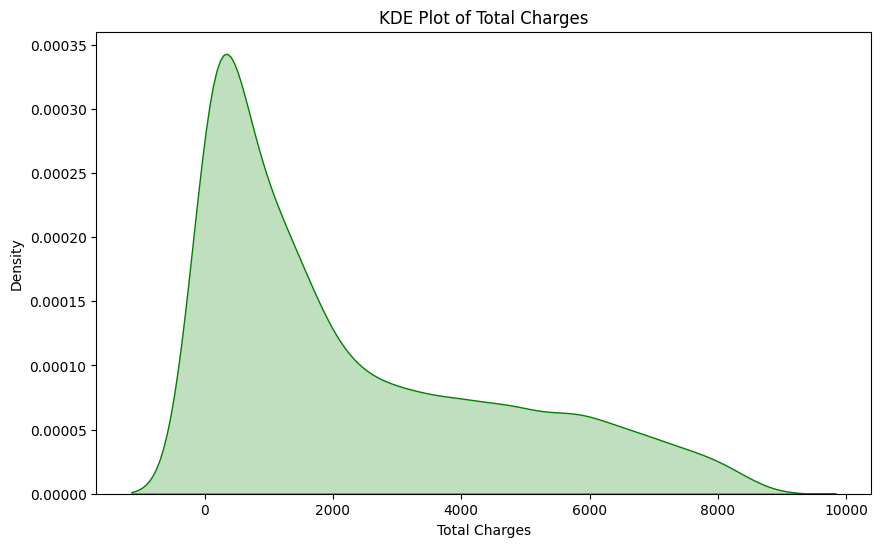

In [22]:
plt.figure(figsize=(10,6))
sns.kdeplot(df1['Total Charges'], shade=True, color='green')
plt.title('KDE Plot of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.show()

In [23]:
df1['Total Charges'] = pd.to_numeric(df1['Total Charges'], errors="coerce")
df1['Total Charges'].median(),df1['Total Charges'].mean()

(1397.475, np.float64(2283.3004408418656))

In [24]:
median_value = df1['Total Charges'].median()
df1['Total Charges'].fillna(median_value, inplace=True)


<ipython-input-24-35147699c744>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Total Charges'].fillna(median_value, inplace=True)


In [25]:
missing_values = df1['Total Charges'].isnull().sum()
print(f"Missing values in 'Total Charges': {missing_values}")


Missing values in 'Total Charges': 0


In [26]:
df1.shape

(7043, 21)

In [27]:
df2= df1.copy()

In [28]:
df2

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59


In [29]:
df2.nunique()

,0
Gender,2
Senior Citizen,2
Partner,2
Dependents,2
Tenure Months,73
Phone Service,2
Multiple Lines,3
Internet Service,3
Online Security,3
Online Backup,3


In [30]:
df2['Tenure Months'].value_counts()

,count
Tenure Months,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [31]:
# Assuming 'telco_data' is your DataFrame and 'Tenure Months' is the column containing tenure information
#labels = ['{0}-{1}'.format(i, i+11) for i in range(1, 73, 12)]  # Corrected range to include 72
#df2["Tenure_Months_group"] = pd.cut(df2['Tenure Months'], range(0, 84, 12), right=False, labels=labels)


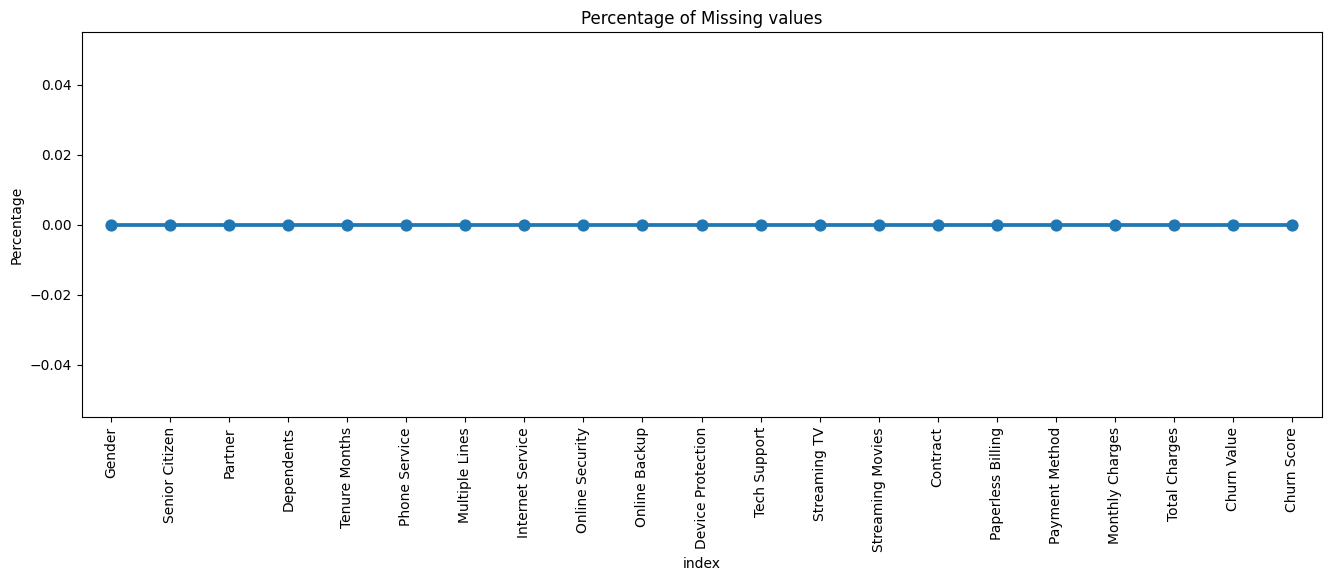

In [33]:
missing = pd.DataFrame((df2.isnull().sum()) * 100 / df2.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=10)
plt.title("Percentage of Missing values")
plt.ylabel('Percentage')
plt.show()

<ipython-input-34-849c6410f516>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['Total Charges'], shade=True, color='green')


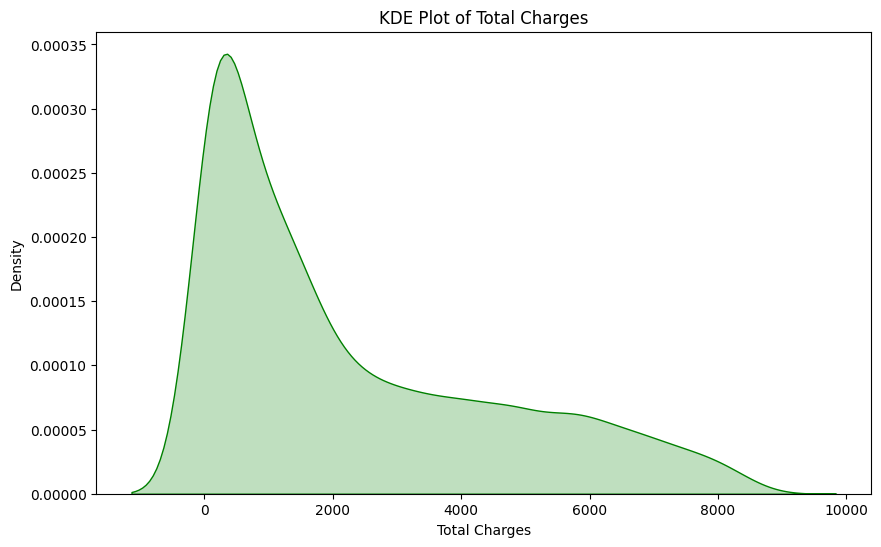

In [34]:
# Distribution after filling the missing values through median
plt.figure(figsize=(10,6))
sns.kdeplot(df2['Total Charges'], shade=True, color='green')
plt.title('KDE Plot of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.show()

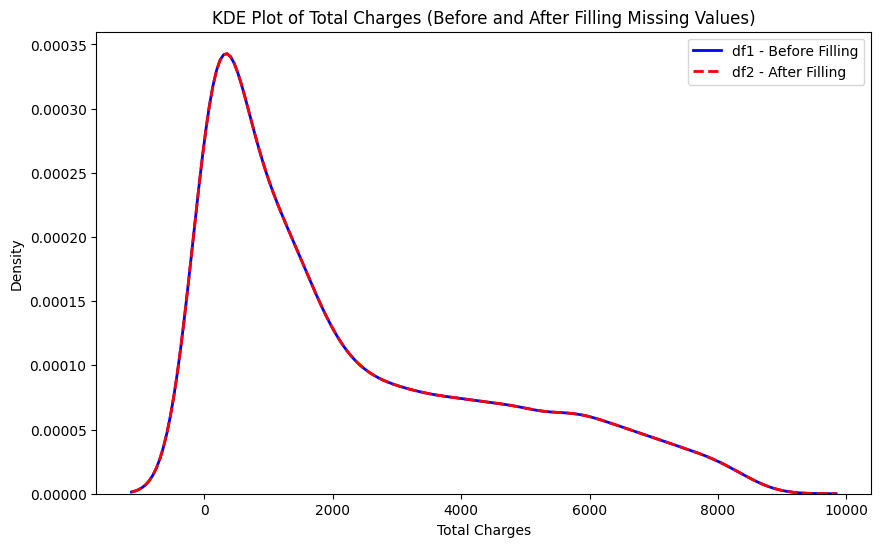

In [35]:
# Plot both KDEs on the same graph
plt.figure(figsize=(10,6))
sns.kdeplot(df1['Total Charges'], color='blue', label='df1 - Before Filling', linestyle='-', linewidth=2)
sns.kdeplot(df2['Total Charges'],color='red', label='df2 - After Filling',  linestyle='--', linewidth=2)
plt.title('KDE Plot of Total Charges (Before and After Filling Missing Values)')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: >

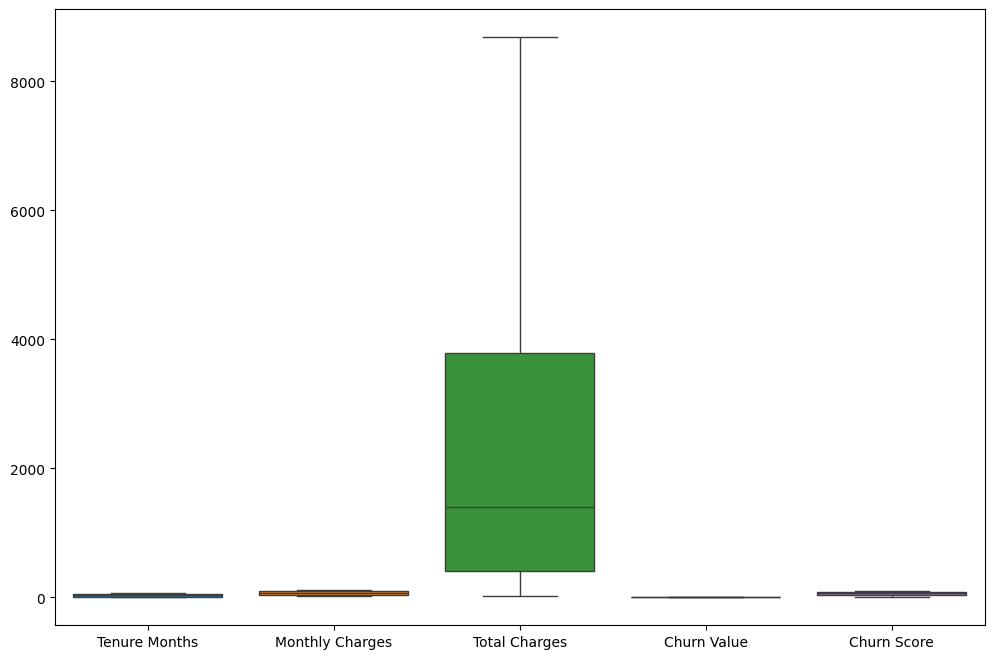

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

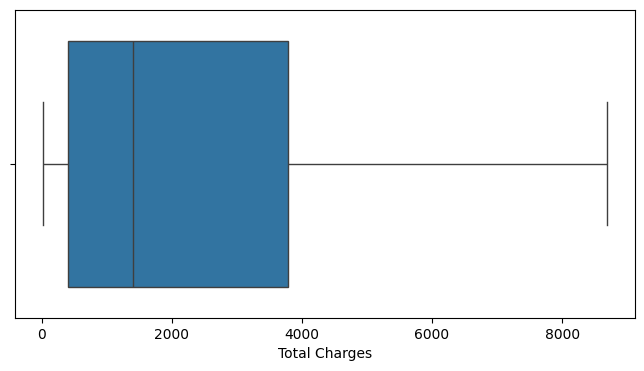

In [37]:
# Set the figure size
plt.figure(figsize=(8, 4))
sns.boxplot(x='Total Charges', data=df2)
plt.show()

In [38]:
# TO chek the out liers by Z score

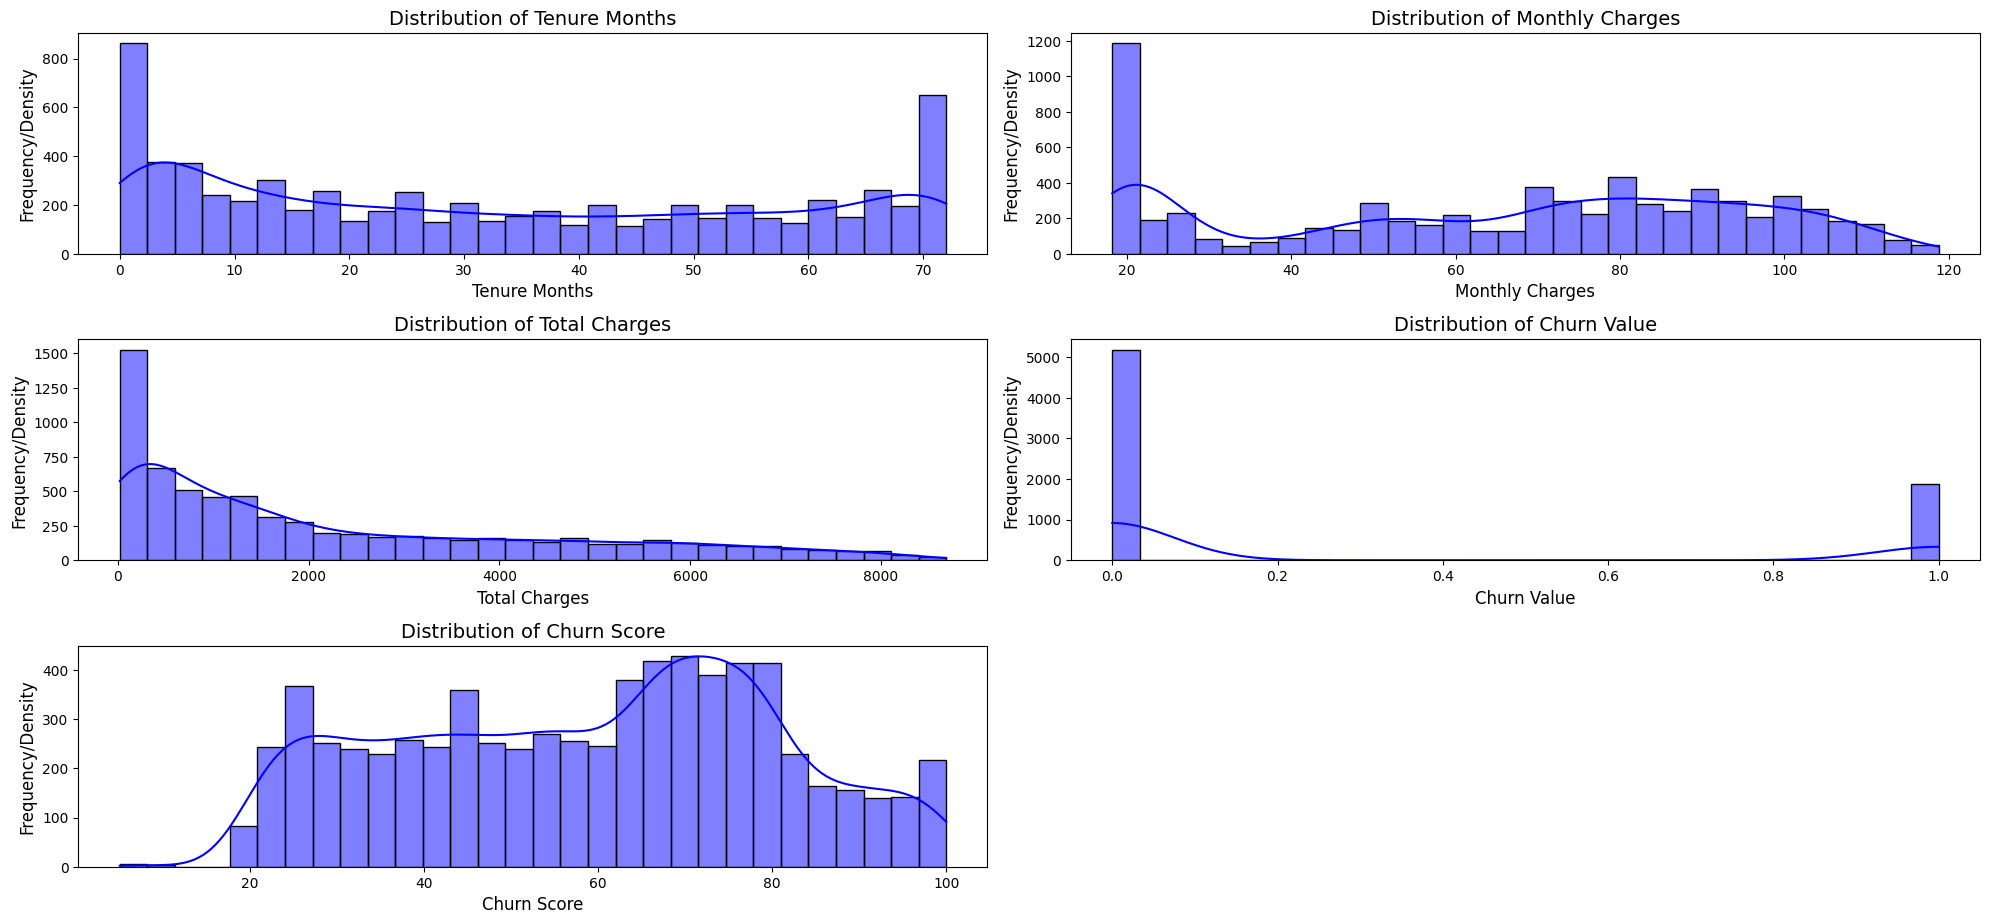

In [39]:
# Filter only the numerical columns from df2
numerical_df2 = df2.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_df2.columns, 1):
    plt.subplot(len(numerical_df2.columns), 2, i)
    sns.histplot(numerical_df2[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency/Density', fontsize=12)
plt.tight_layout()
plt.show()

In [40]:
# Assuming df2 is defined in your environment
tenure_months_column = df2['Tenure Months']
print(tenure_months_column)

0        2
1        2
2        8
3       28
4       49
        ..
7038    72
7039    24
7040    72
7041    11
7042    66
Name: Tenure Months, Length: 7043, dtype: int64


In [41]:
# Find NaN values in the 'Tenure Months' column
nan_count = df2['Tenure Months'].isnull().sum()
print(f"Number of NaN values in 'Tenure Months': {nan_count}")
nan_rows = df2[df2['Tenure Months'].isnull()]
print(nan_rows)

Number of NaN values in 'Tenure Months': 0
Empty DataFrame
Columns: [Gender, Senior Citizen, Partner, Dependents, Tenure Months, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges, Churn Value, Churn Score]
Index: []

[0 rows x 21 columns]


In [42]:
df2[["Tenure Months"]].isnull().sum()

,0
Tenure Months,0


In [43]:
# get the max tenure
print(df2['Tenure Months'].max())

72


In [44]:
# get the max tenure
print(df2['Tenure Months'].min())

0


In [45]:
df2

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59


In [46]:
# Assuming df2 already contains the 'Tenure Months' column
tenure_months_column = df2['Tenure Months']
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df2['Tenure Range'] = pd.cut(tenure_months_column, bins=bins, labels=labels, include_lowest=True)
print(df2[['Tenure Months', 'Tenure Range']])

      Tenure Months Tenure Range
0                 2         1-12
1                 2         1-12
2                 8         1-12
3                28        25-36
4                49        49-60
...             ...          ...
7038             72        61-72
7039             24        13-24
7040             72        61-72
7041             11         1-12
7042             66        61-72

[7043 rows x 2 columns]


In [47]:
# Create a mapping for the Tenure Range bins
tenure_range_mapping = {
    '1-12': 1,
    '13-24': 2,
    '25-36': 3,
    '37-48': 4,
    '49-60': 5,
    '61-72': 6
}

df2['Tenure Range Encoded'] = df2['Tenure Range'].map(tenure_range_mapping)
print(df2[['Tenure Range', 'Tenure Range Encoded']])

     Tenure Range Tenure Range Encoded
0            1-12                    1
1            1-12                    1
2            1-12                    1
3           25-36                    3
4           49-60                    5
...           ...                  ...
7038        61-72                    6
7039        13-24                    2
7040        61-72                    6
7041         1-12                    1
7042        61-72                    6

[7043 rows x 2 columns]


In [48]:
df2

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,Tenure Range,Tenure Range Encoded
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,1-12,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,1-12,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,1-12,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,25-36,3
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,49-60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,61-72,6
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,13-24,2
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,61-72,6
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,1-12,1


In [49]:
df2.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'Tenure Range', 'Tenure Range Encoded'],
      dtype='object')

In [50]:
df2.shape

(7043, 23)

In [51]:
# Drop the 'Tenure Range' column and create a new DataFrame
df_new = df2.drop(columns=['Tenure Range','Tenure Months'])
print(df_new)

      Gender Senior Citizen Partner Dependents Phone Service  \
0       Male             No      No         No           Yes   
1     Female             No      No        Yes           Yes   
2     Female             No      No        Yes           Yes   
3     Female             No     Yes        Yes           Yes   
4       Male             No      No        Yes           Yes   
...      ...            ...     ...        ...           ...   
7038  Female             No      No         No           Yes   
7039    Male             No     Yes        Yes           Yes   
7040  Female             No     Yes        Yes           Yes   
7041  Female             No     Yes        Yes            No   
7042    Male             No      No         No           Yes   

        Multiple Lines Internet Service      Online Security  \
0                   No              DSL                  Yes   
1                   No      Fiber optic                   No   
2                  Yes      Fiber optic

In [52]:
df_new.shape

(7043, 21)

In [53]:
df_new.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score',
       'Tenure Range Encoded'],
      dtype='object')

# **EDA**

<ipython-input-54-6efc1adb48e0>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


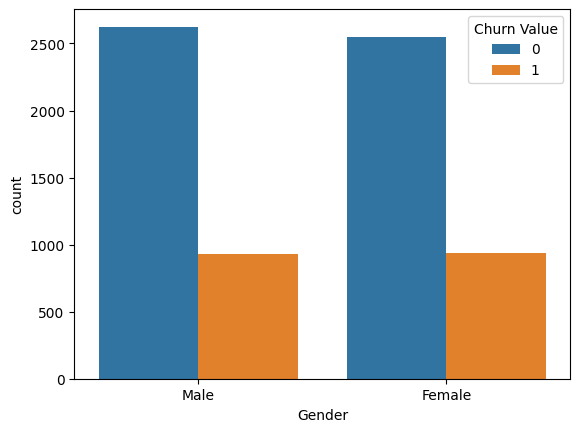

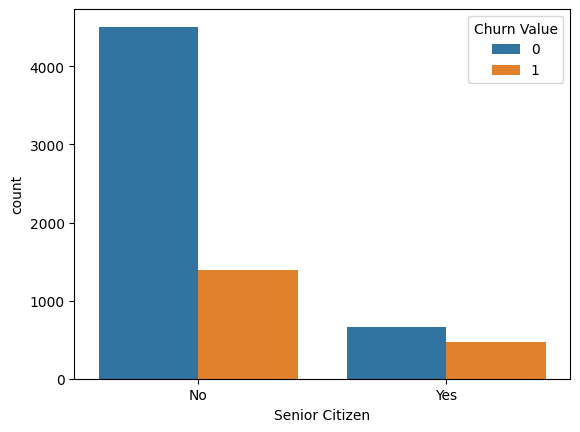

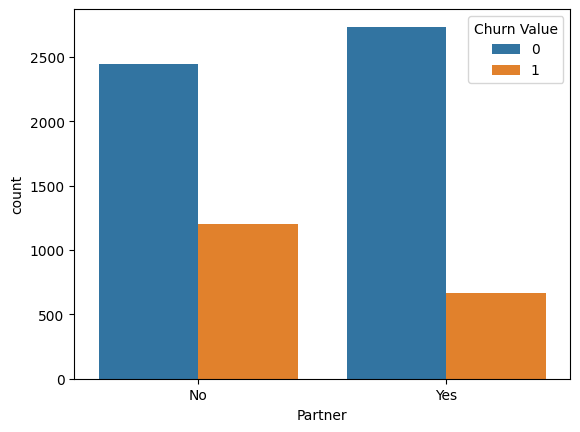

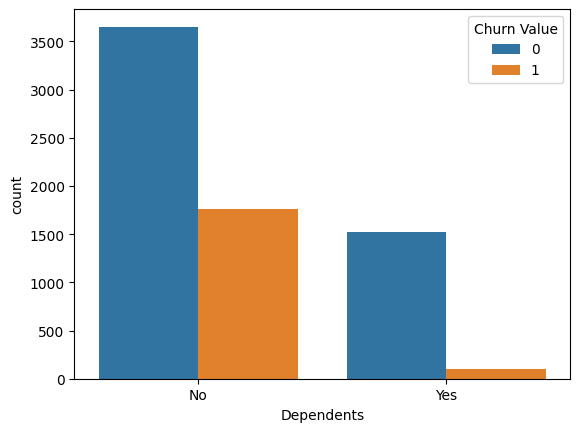

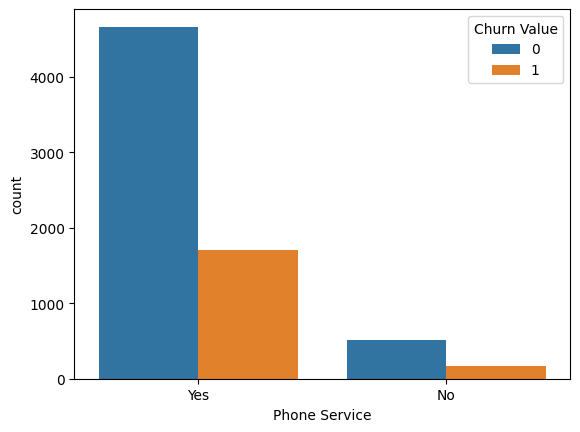

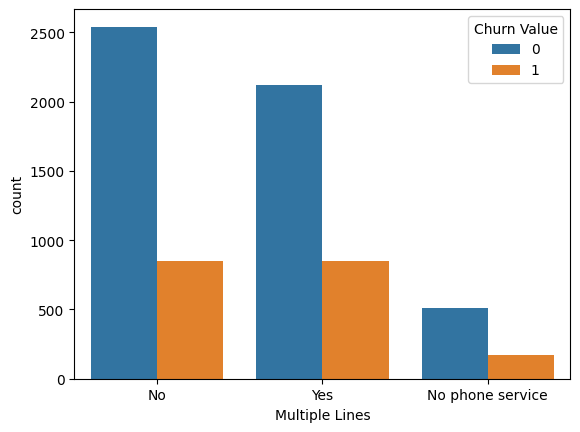

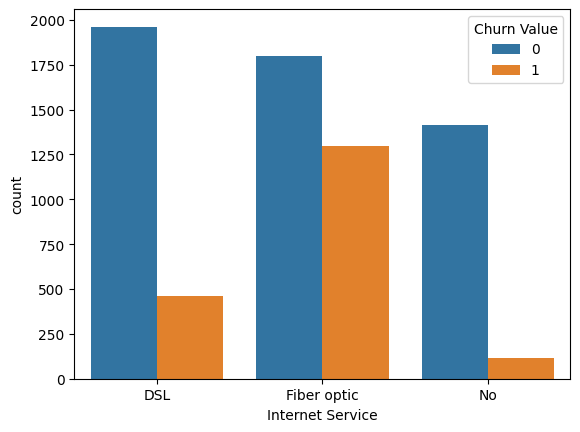

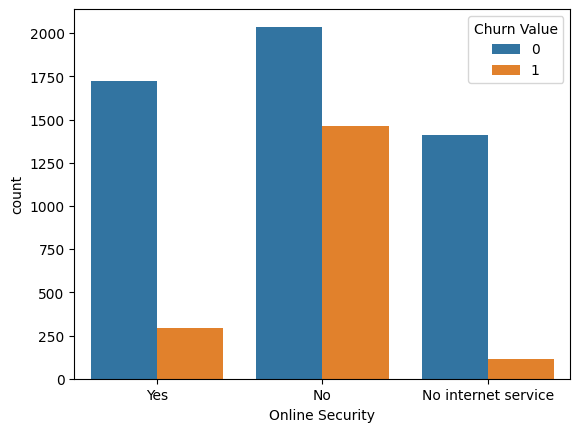

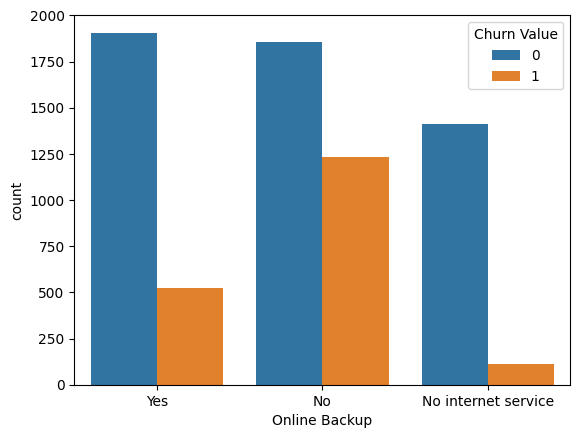

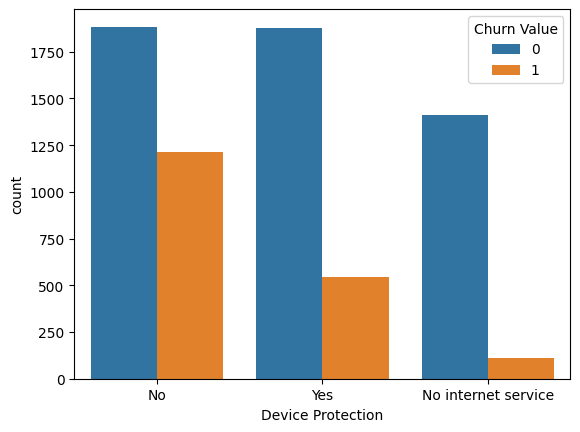

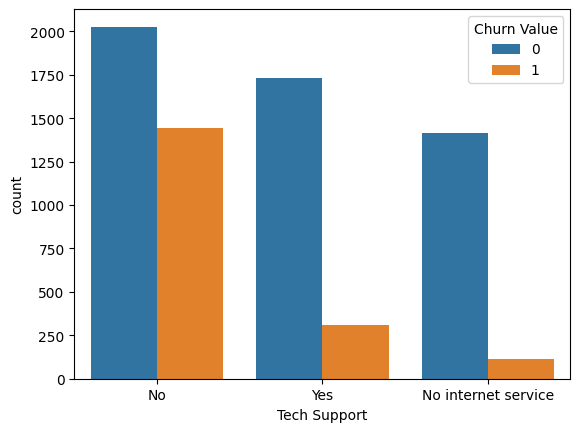

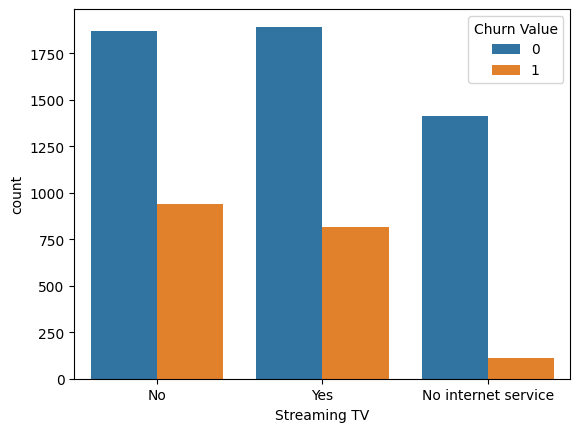

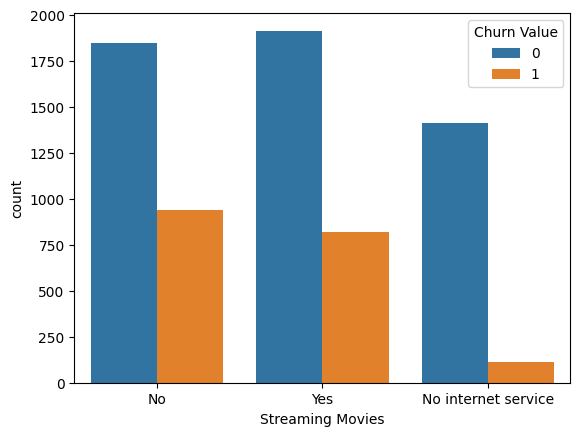

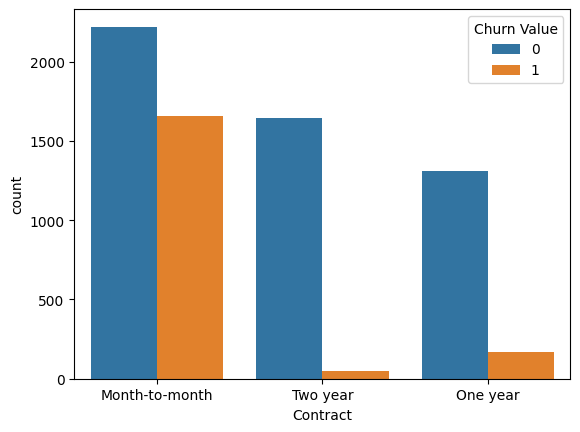

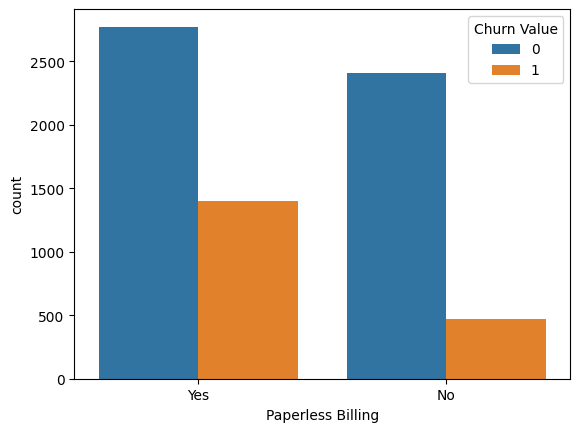

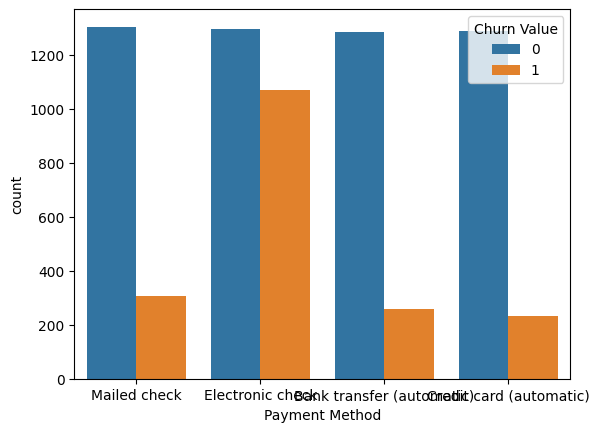

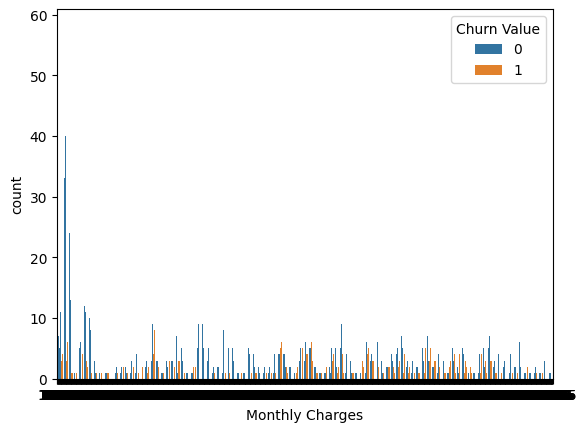

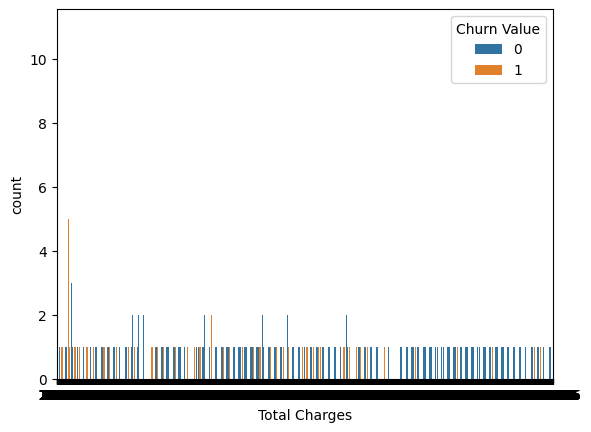

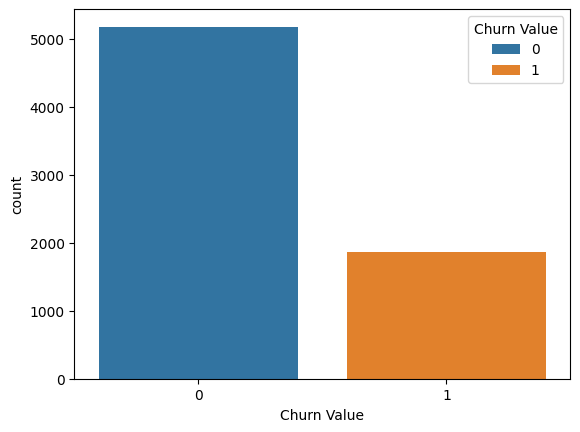

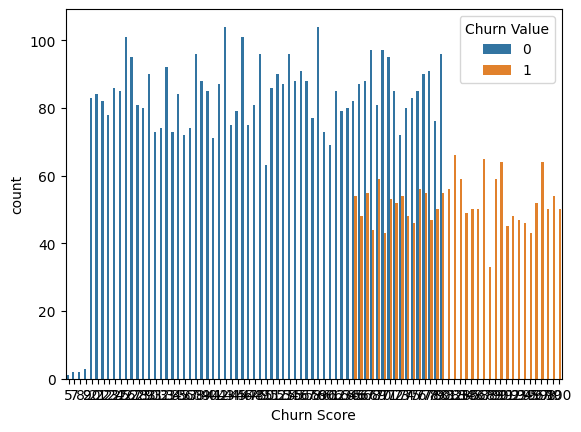

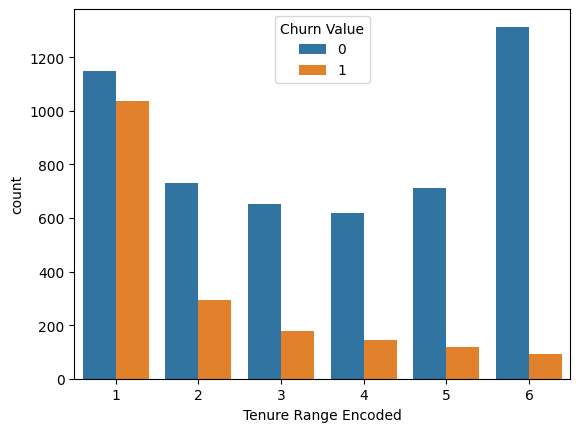

In [54]:
# EDA of predictor variable
for i, predictor in enumerate(df_new):
    plt.figure(i)
    sns.countplot(data=df_new, x=predictor, hue='Churn Value')

**Encoding**

In [55]:
#Manually assigning ordinal values to each column
df_new['Gender'] = df_new['Gender'].replace({'Male': 1, 'Female': 0})
df_new['Senior Citizen'] = df_new['Senior Citizen'].replace({'Yes': 1, 'No': 0})
df_new['Partner'] = df_new['Partner'].replace({'Yes': 1, 'No': 0})
df_new['Dependents'] = df_new['Dependents'].replace({'Yes': 1, 'No': 0})
df_new['Phone Service'] = df_new['Phone Service'].replace({'Yes': 1, 'No': 0})
df_new['Multiple Lines'] = df_new['Multiple Lines'].replace({'No phone service': 0, 'No': 1, 'Yes': 2})
df_new['Internet Service'] = df_new['Internet Service'].replace({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df_new['Online Security'] = df_new['Online Security'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df_new['Online Backup'] = df_new['Online Backup'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df_new['Device Protection'] = df_new['Device Protection'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df_new['Tech Support'] = df_new['Tech Support'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df_new['Streaming TV'] = df_new['Streaming TV'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df_new['Streaming Movies'] = df_new['Streaming Movies'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df_new['Contract'] = df_new['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_new['Paperless Billing'] = df_new['Paperless Billing'].replace({'Yes': 1, 'No': 0})
df_new['Payment Method'] = df_new['Payment Method'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
print(df_new.head())

   Gender  Senior Citizen  Partner  Dependents  Phone Service  Multiple Lines  \
0       1               0        0           0              1               1   
1       0               0        0           1              1               1   
2       0               0        0           1              1               2   
3       0               0        1           1              1               2   
4       1               0        0           1              1               2   

   Internet Service  Online Security  Online Backup  Device Protection  ...  \
0                 1                1              1                  0  ...   
1                 2                0              0                  0  ...   
2                 2                0              0                  1  ...   
3                 2                0              0                  1  ...   
4                 2                0              1                  1  ...   

   Streaming TV  Streaming Movies  Con

<ipython-input-55-0230671048cf>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['Gender'] = df_new['Gender'].replace({'Male': 1, 'Female': 0})
<ipython-input-55-0230671048cf>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['Senior Citizen'] = df_new['Senior Citizen'].replace({'Yes': 1, 'No': 0})
<ipython-input-55-0230671048cf>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To o

In [56]:
df_new.dtypes

,0
Gender,int64
Senior Citizen,int64
Partner,int64
Dependents,int64
Phone Service,int64
Multiple Lines,int64
Internet Service,int64
Online Security,int64
Online Backup,int64
Device Protection,int64


In [57]:
df_new.shape

(7043, 21)

In [58]:
df_new.head(10)

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,Tenure Range Encoded
0,1,0,0,0,1,1,1,1,1,0,...,0,0,0,1,1,53.85,108.15,1,86,1
1,0,0,0,1,1,1,2,0,0,0,...,0,0,0,1,0,70.70,151.65,1,67,1
2,0,0,0,1,1,2,2,0,0,1,...,1,1,0,1,0,99.65,820.50,1,86,1
3,0,0,1,1,1,2,2,0,0,1,...,1,1,0,1,0,104.80,3046.05,1,84,3
4,1,0,0,1,1,2,2,0,1,1,...,1,1,0,1,2,103.70,5036.30,1,89,5
5,0,0,1,0,1,1,1,0,0,1,...,0,0,0,0,3,55.20,528.35,1,78,1
6,1,1,0,0,0,0,1,0,0,1,...,0,1,0,1,0,39.65,39.65,1,100,1
7,1,0,0,0,1,1,0,2,2,2,...,2,2,0,0,1,20.15,20.15,1,92,1
8,1,0,1,1,1,2,2,0,1,0,...,1,1,0,1,0,99.35,4749.15,1,77,4
9,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,30.20,30.20,1,97,1


In [59]:
df_new.tail(10)

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,Tenure Range Encoded
7033,0,0,0,0,1,1,0,2,2,2,...,2,2,0,1,1,20.05,39.25,0,80,1
7034,1,1,1,0,1,2,1,1,1,0,...,0,0,1,0,3,60.00,3316.10,0,71,5
7035,1,0,0,0,1,1,2,0,0,0,...,0,0,0,1,3,69.50,2625.25,0,35,4
7036,1,0,0,0,1,1,2,0,0,0,...,1,0,0,1,2,78.70,1495.10,0,20,2
7037,0,0,0,0,0,0,1,0,1,1,...,1,1,1,0,0,60.65,743.30,0,24,1
7038,0,0,0,0,1,1,0,2,2,2,...,2,2,2,1,2,21.15,1419.40,0,45,6
7039,1,0,1,1,1,2,1,1,0,1,...,1,1,1,1,1,84.80,1990.50,0,59,2
7040,0,0,1,1,1,2,2,0,1,1,...,1,1,1,1,3,103.20,7362.90,0,71,6
7041,0,0,1,1,0,0,1,1,0,0,...,0,0,0,1,0,29.60,346.45,0,59,1
7042,1,0,0,0,1,1,2,1,0,1,...,1,1,2,1,2,105.65,6844.50,0,38,6


In [60]:
df_new.isnull().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0
Online Backup,0
Device Protection,0


In [62]:
print(df_new.dtypes)

Gender                     int64
Senior Citizen             int64
Partner                    int64
Dependents                 int64
Phone Service              int64
Multiple Lines             int64
Internet Service           int64
Online Security            int64
Online Backup              int64
Device Protection          int64
Tech Support               int64
Streaming TV               int64
Streaming Movies           int64
Contract                   int64
Paperless Billing          int64
Payment Method             int64
Monthly Charges          float64
Total Charges            float64
Churn Value                int64
Churn Score                int64
Tenure Range Encoded    category
dtype: object


In [63]:
df_new.shape

(7043, 21)

In [64]:
print(df_new.columns.tolist())


['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'Tenure Range Encoded']


Encoding
**bold text**

<ipython-input-65-eef006df3b22>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_new['Total Charges'][df_new['Churn Value'] == 0], color='red', shade=True)
<ipython-input-65-eef006df3b22>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_new['Total Charges'][df_new['Churn Value'] == 1], ax=Tot, color='blue', shade=True)


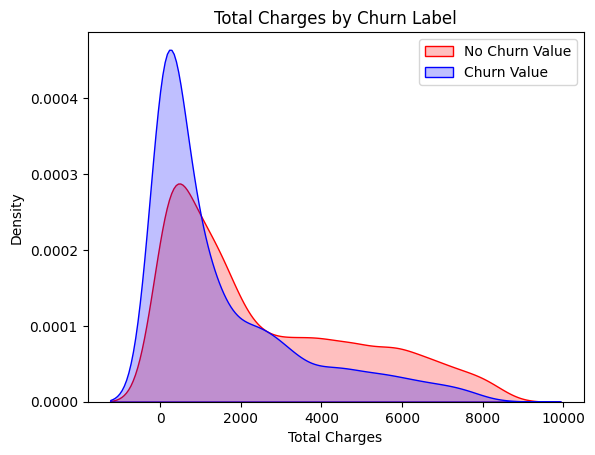

In [65]:
# Create the kernel density plot (KDE)
Tot = sns.kdeplot(df_new['Total Charges'][df_new['Churn Value'] == 0], color='red', shade=True)
Tot = sns.kdeplot(df_new['Total Charges'][df_new['Churn Value'] == 1], ax=Tot, color='blue', shade=True)
Tot.legend(["No Churn Value", "Churn Value"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel("Total Charges")
Tot.set_title("Total Charges by Churn Label")
plt.show()

In [66]:
#higher churn at lower total charges.
#however if we combine the insight of 3 parameters i..e Tenure, Monthly charges ,&Total charges then the picture is bit clear .
# Higher Monthly charges at lower tenure results into lower total charges.hence, all these 3 factor viz higher monthly charge, lower tenure and Lower Total charges are linked to high churn.

In [67]:
# could be multiple reason for churning .....main churning reason are above the 0.00 in above graph.
# High churn seen in case of Month to month contracts,No online security , No tech support,First year of subscription and Fiber optics Internet .
# Low churn is seens in case of Long term contracts, Subscription without internet services and The customers engaged for +5 years .
#Factors like Gender , Availability of phone services and # of multiple lines have almost No impact on churn.
# this is also evident from the heatmap below .

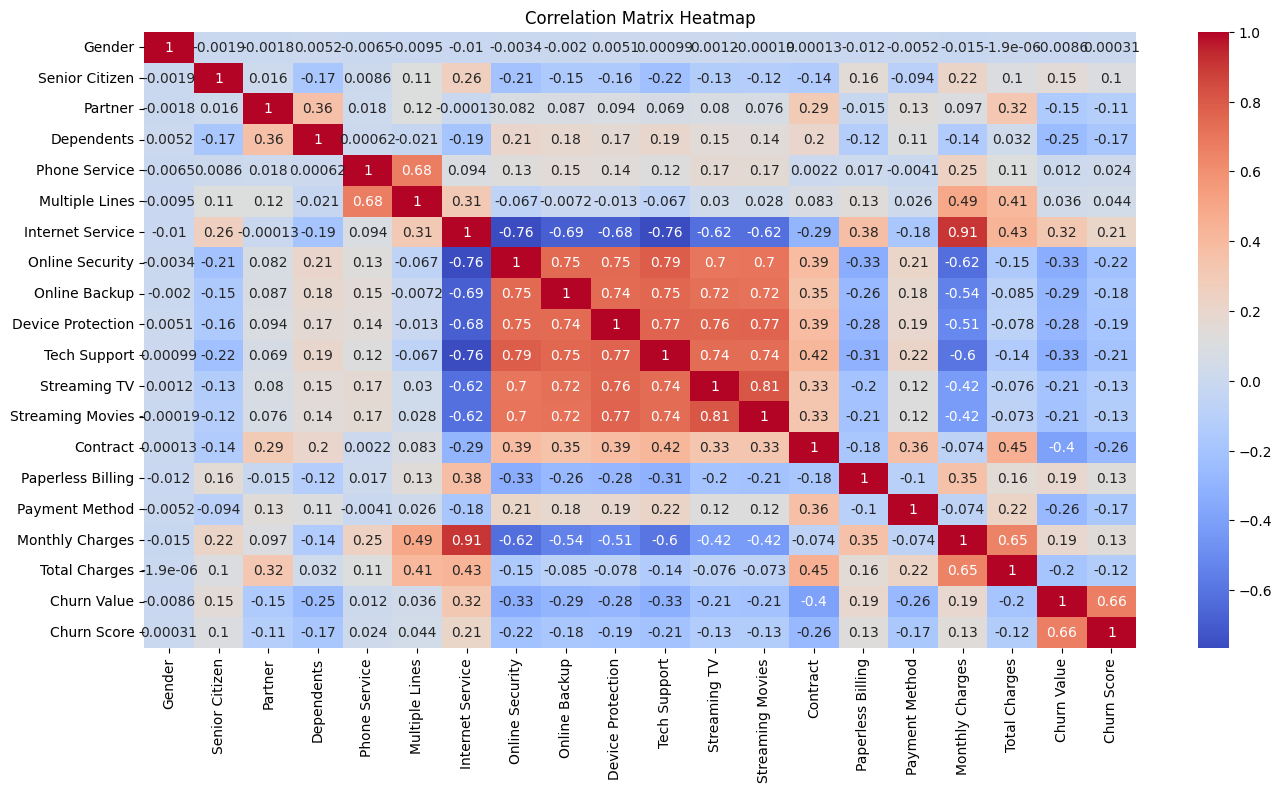

In [68]:
numeric_df_new = df_new.select_dtypes(include='number')
corr = numeric_df_new.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [70]:
print(df_new.columns.tolist())

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'Tenure Range Encoded']


In [71]:
# PCA
features_to_use = ['Online Security', 'Online Backup', 'Device Protection',
                   'Tech Support', 'Streaming TV', 'Streaming Movies',
                    'Internet Service']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new[features_to_use])
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)
print("Transformed PCA Data:")
print(df_pca)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Transformed PCA Data:
[[-1.20054504 -1.32385954  0.78888654 -0.29097668  0.25038304 -0.67249446]
 [-2.62718636 -0.09891574  0.03062418  0.07839044  0.12045685  0.10588239]
 [-1.14822512  1.36004849 -0.58780768  0.43416405 -0.19111183 -0.2966504 ]
 ...
 [-0.66411721  1.32669547  0.55441848  0.26717862 -0.46955251 -0.336255  ]
 [-1.68465295 -1.29050652 -0.35333962 -0.12399125  0.52882372 -0.63288985]
 [-0.17711698  0.75916783 -0.70954282  0.48883512  0.93946421  0.44642189]]
Explained variance ratio: [0.76963931 0.07077745 0.03976959 0.03329701 0.03050426 0.02888325]


In [72]:
# features for PCA
features_to_use = ['Online Security', 'Online Backup', 'Device Protection',
                   'Tech Support', 'Streaming TV', 'Streaming Movies',
                   'Internet Service']
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_new[features_to_use])
print("Transformed PCA Data:")
print(df_pca)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Transformed PCA Data:
[[-0.91307069 -1.02492636  0.6467954 ]
 [-2.04233945 -0.08126497  0.0215171 ]
 [-0.92643496  1.05009901 -0.47028748]
 ...
 [-0.55009907  1.04413075  0.42060201]
 [-1.28940659 -1.0189581  -0.24409409]
 [-0.13435764  0.56957337 -0.5737534 ]]
Explained variance ratio: [0.77026895 0.06976075 0.03960891]


<ipython-input-73-e634514a421c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, palette='viridis')


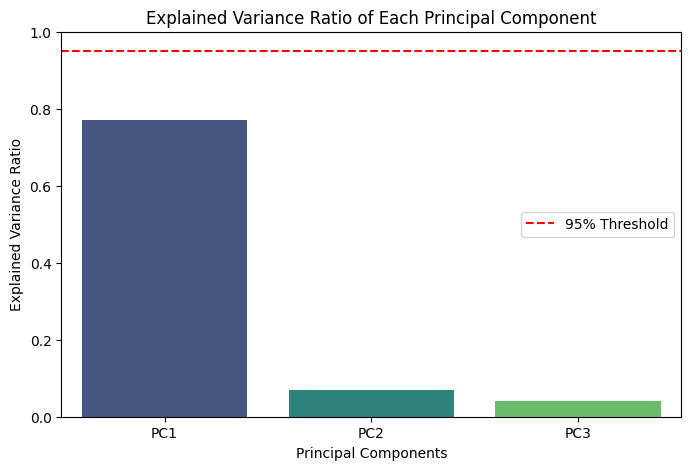

In [73]:
# explained variance ratios from PCA
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, palette='viridis')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, 1)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.show()

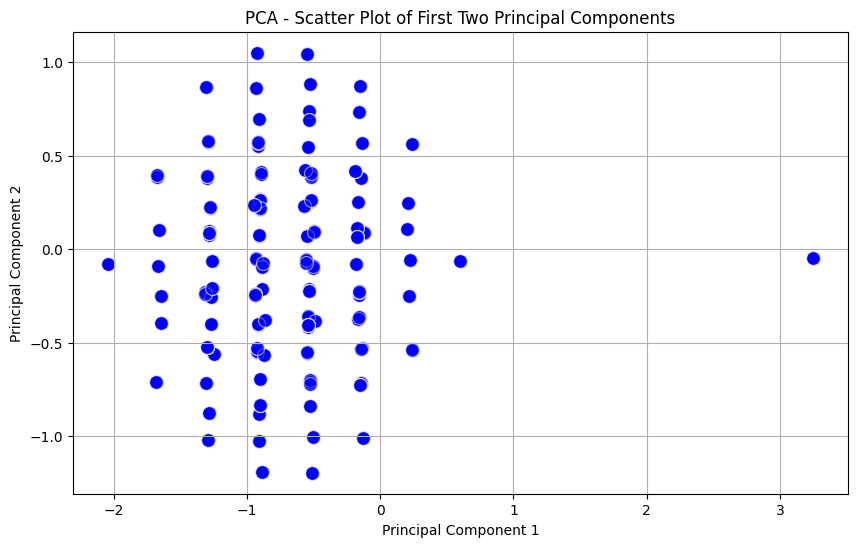

In [74]:
# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, color='blue', alpha=0.6)
plt.title('PCA - Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

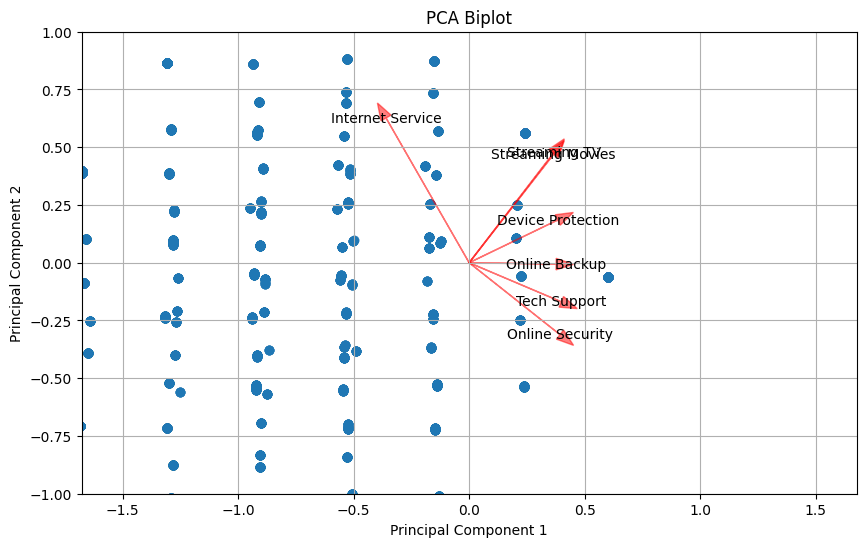

In [75]:
# to create a biplot
def biplot(pca_results, pca, features):
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5)
    for i in range(len(features)):
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
                  color='red', alpha=0.5, head_width=0.05)
        plt.text(pca.components_[0, i], pca.components_[1, i],
                 features[i], color='black', ha='center', va='center')
    plt.title('PCA Biplot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.axis('equal')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.show()
biplot(df_pca, pca, features_to_use)

In [78]:
features_to_use = ['Online Security', 'Online Backup', 'Device Protection',
                   'Tech Support', 'Streaming TV', 'Streaming Movies',
                    'Internet Service']
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_new[features_to_use])
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])
df_combined = pd.concat([df_new.drop(columns=features_to_use).reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
print(df_combined.head())

   Gender  Senior Citizen  Partner  Dependents  Phone Service  Multiple Lines  \
0       1               0        0           0              1               1   
1       0               0        0           1              1               1   
2       0               0        0           1              1               2   
3       0               0        1           1              1               2   
4       1               0        0           1              1               2   

   Contract  Paperless Billing  Payment Method  Monthly Charges  \
0         0                  1               1            53.85   
1         0                  1               0            70.70   
2         0                  1               0            99.65   
3         0                  1               0           104.80   
4         0                  1               2           103.70   

   Total Charges  Churn Value  Churn Score Tenure Range Encoded       PC1  \
0         108.15            1    

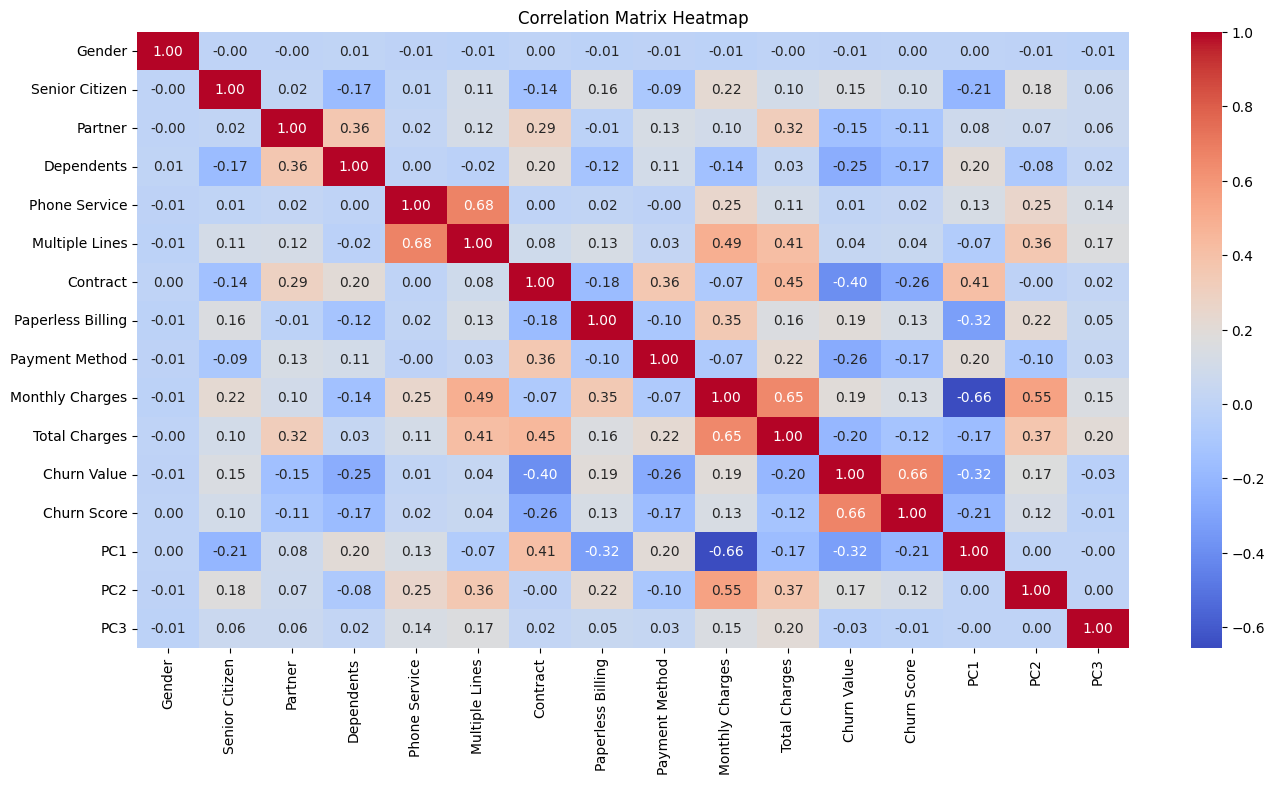

In [79]:
# correlation matrix
numeric_df_combined = df_combined.select_dtypes(include='number')
corr = numeric_df_combined.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Spliting the data sets

In [81]:
# Split the dataset into features (X) and target (y)
X = df_combined.drop('Churn Value', axis=1)
y = df_combined['Churn Value']

In [82]:
X

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,Tenure Range Encoded,PC1,PC2,PC3
0,1,0,0,0,1,1,0,1,1,53.85,108.15,86,1,-0.913071,-1.024926,0.646795
1,0,0,0,1,1,1,0,1,0,70.70,151.65,67,1,-2.042339,-0.081265,0.021517
2,0,0,0,1,1,2,0,1,0,99.65,820.50,86,1,-0.926435,1.050099,-0.470287
3,0,0,1,1,1,2,0,1,0,104.80,3046.05,84,3,-0.527599,0.880832,-0.618812
4,1,0,0,1,1,2,0,1,2,103.70,5036.30,89,5,-0.550099,1.044131,0.420602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,1,2,1,2,21.15,1419.40,45,6,3.245679,-0.044395,-0.008585
7039,1,0,1,1,1,2,1,1,1,84.80,1990.50,59,2,0.225334,-0.056862,-0.884423
7040,0,0,1,1,1,2,1,1,3,103.20,7362.90,71,6,-0.550099,1.044131,0.420602
7041,0,0,1,1,0,0,0,1,0,29.60,346.45,59,1,-1.289407,-1.018958,-0.244094


In [83]:
X.shape

(7043, 16)

In [84]:
y.shape

(7043,)

In [85]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,Tenure Range Encoded,PC1,PC2,PC3
2142,1,0,1,0,1,2,1,1,3,98.65,6962.85,28,6,-0.926435,1.050099,-0.470287
1623,0,0,0,0,1,1,0,1,3,93.20,1573.70,75,2,-0.916467,0.567352,0.588800
6074,0,0,0,0,1,2,1,1,3,104.05,3416.85,60,3,-0.550099,1.044131,0.420602
1362,0,1,1,0,0,0,0,1,3,40.65,933.30,85,2,-0.933111,-0.053115,-0.612759
6754,0,0,1,1,1,1,0,0,1,20.05,406.05,43,2,3.245679,-0.044395,-0.008585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,1,1,2,1,0,100.40,4303.65,76,4,-0.527599,0.880832,-0.618812
5191,0,0,0,0,1,1,2,0,3,20.70,762.45,45,4,3.245679,-0.044395,-0.008585
5226,1,0,1,1,1,1,2,0,1,20.20,387.40,60,2,3.245679,-0.044395,-0.008585
5390,1,0,1,1,1,1,1,0,0,19.90,666.00,30,3,3.245679,-0.044395,-0.008585


In [87]:
X_train.isna().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Phone Service,0
Multiple Lines,0
Contract,0
Paperless Billing,0
Payment Method,0
Monthly Charges,0


In [88]:
 X_test.shape

(1409, 16)

In [89]:
y_train.shape

(5634,)

In [90]:
y_test.shape

(1409,)

In [91]:
y_train.isna().sum()

np.int64(0)

In [92]:
X_test.isna().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Phone Service,0
Multiple Lines,0
Contract,0
Paperless Billing,0
Payment Method,0
Monthly Charges,0


In [93]:
X_train.isna().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Phone Service,0
Multiple Lines,0
Contract,0
Paperless Billing,0
Payment Method,0
Monthly Charges,0


Model building before balancing the data sets

In [94]:
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [95]:
#  Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [97]:
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.4f}")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 1.0000
Test Accuracy: 0.9248
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1009
           1       0.88      0.85      0.87       400

    accuracy                           0.92      1409
   macro avg       0.91      0.90      0.91      1409
weighted avg       0.92      0.92      0.92      1409

[[962  47]
 [ 59 341]]


In [98]:
# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [99]:
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

In [100]:
# Calculate accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy*100:.2f}")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 92.12
Test Accuracy: 90.84
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1009
           1       0.84      0.84      0.84       400

    accuracy                           0.91      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.91      0.91      0.91      1409

[[945  64]
 [ 65 335]]


In [101]:
#  Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [102]:
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

In [103]:
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy*100:.2f}")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 100.00
Test Accuracy: 90.63
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1009
           1       0.84      0.82      0.83       400

    accuracy                           0.91      1409
   macro avg       0.89      0.88      0.88      1409
weighted avg       0.91      0.91      0.91      1409

[[947  62]
 [ 70 330]]


# Scalling

In [104]:
# Columns to scale
cols_to_scale = ['Total Charges', 'Monthly Charges', 'Churn Score','Tenure Range Encoded']
scaler = StandardScaler()
X[cols_to_scale] = pd.DataFrame(scaler.fit_transform(X[cols_to_scale]), columns=cols_to_scale, index=X.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(X_test.head())

      Gender  Senior Citizen  Partner  Dependents  Phone Service  \
2142       1               0        1           0              1   
1623       0               0        0           0              1   
6074       0               0        0           0              1   
1362       0               1        1           0              0   
6754       0               0        1           1              1   

      Multiple Lines  Contract  Paperless Billing  Payment Method  \
2142               2         1                  1               3   
1623               1         0                  1               3   
6074               2         1                  1               3   
1362               0         0                  1               3   
6754               1         0                  0               1   

      Monthly Charges  Total Charges  Churn Score  Tenure Range Encoded  \
2142         1.126310       2.066537    -1.426314              1.460582   
1623         0.945174     

In [105]:
X_train.isna().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Phone Service,0
Multiple Lines,0
Contract,0
Paperless Billing,0
Payment Method,0
Monthly Charges,0


In [106]:
X_test.isna().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Phone Service,0
Multiple Lines,0
Contract,0
Paperless Billing,0
Payment Method,0
Monthly Charges,0


In [107]:
df2['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,1869


In [108]:
pip install imbalanced-learn

In [109]:
Yp=df2['Churn Value']

In [110]:
Yp.shape

(7043,)

# Balancing the target values

In [111]:
pip install imbalanced-learn

In [112]:
# Balance the target values
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Balanced X_train:")
print(X_train_balanced.value_counts())
print("Balanced y_train:")
print(y_train_balanced.value_counts())

Balanced X_train:
Gender  Senior Citizen  Partner  Dependents  Phone Service  Multiple Lines  Contract  Paperless Billing  Payment Method  Monthly Charges  Total Charges  Churn Score  Tenure Range Encoded  PC1        PC2        PC3      
1       1               1        1           1              2               2         1                  3                1.694644         2.700635       0.060426     1.460582              0.241978   0.563605   0.317136    1
0       0               0        0           0              0               0         0                  0               -1.349768        -0.648718       0.757335    -0.091920             -1.682648  -0.707700  -0.289153    1
                                                                                                                         -1.338135        -0.986935      -0.218338    -1.126921             -1.682648  -0.707700  -0.289153    1
                                                                                       

In [113]:
X_train_balanced.shape

(8330, 16)

In [114]:
y_train_balanced.shape

(8330,)

In [115]:
smote = SMOTE(random_state=42)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)
print("Balanced X_test:")
print(X_test_balanced.value_counts())
print("Balanced y_test:")
print(y_test_balanced.value_counts())

Balanced X_test:
Gender  Senior Citizen  Partner  Dependents  Phone Service  Multiple Lines  Contract  Paperless Billing  Payment Method  Monthly Charges  Total Charges  Churn Score  Tenure Range Encoded  PC1        PC2        PC3      
1       1               1        1           1              2               2         1                  2               -1.341459        -0.323722       0.432111     1.460582              3.245679  -0.044395  -0.008585    1
0       0               0        0           0              0               0         0                  0               -1.337265        -0.971391       0.513233    -1.126921             -1.682648  -0.707700  -0.289153    1
1       1               1        0           1              2               1         1                  2                1.275871         1.991309      -0.357720     1.460582             -0.550099   1.044131   0.420602    1
                                                                                        

In [116]:
X_test_balanced.shape

(2018, 16)

In [117]:
 y_test_balanced.shape

(2018,)

In [118]:
X_train_balanced.isna().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Phone Service,0
Multiple Lines,0
Contract,0
Paperless Billing,0
Payment Method,0
Monthly Charges,0


# MODEL BUILDING

# Decision Tree classifier

In [120]:
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [121]:
model_dt.fit(X_train_balanced,y_train_balanced)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [122]:
y_pred=model_dt.predict(X_test_balanced)

In [123]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [124]:
model_dt.score(X_test_balanced, y_pred)


1.0

In [125]:
print(classification_report( y_test_balanced, y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1009
           1       0.90      0.97      0.93      1009

    accuracy                           0.93      2018
   macro avg       0.93      0.93      0.93      2018
weighted avg       0.93      0.93      0.93      2018



In [126]:
print(confusion_matrix(y_test_balanced,y_pred))

[[905 104]
 [ 33 976]]


In [127]:
score = cross_val_score(model_dt, X_train_balanced,y_train_balanced, cv=5)

In [128]:
np.mean(score)*100

np.float64(92.76110444177672)

In [129]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_balanced,y_train_balanced)
y_pred_rf = model_rf.predict(X_test_balanced)
accuracy_rf = accuracy_score(y_test_balanced, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Classification Report:')
print(classification_report(y_test_balanced, y_pred_rf))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test_balanced, y_pred_rf))

Random Forest Accuracy: 0.93
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1009
           1       0.93      0.93      0.93      1009

    accuracy                           0.93      2018
   macro avg       0.93      0.93      0.93      2018
weighted avg       0.93      0.93      0.93      2018

Random Forest Confusion Matrix:
[[935  74]
 [ 67 942]]


In [130]:
nan_check = X_train_balanced.isnull().sum()
print("Number of NaN values in each column of X_train_balanced:")
print(nan_check)

Number of NaN values in each column of X_train_balanced:
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Phone Service           0
Multiple Lines          0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Score             0
Tenure Range Encoded    0
PC1                     0
PC2                     0
PC3                     0
dtype: int64


In [131]:
nan_check = y_train_balanced.isnull().sum()
print("Number of NaN values in each column of y_train_balanced:")
print(nan_check)

Number of NaN values in each column of y_train_balanced:
0


In [132]:
# SVM model
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_balanced, y_train_balanced)
y_pred_svm = model_svm.predict(X_test_balanced)
accuracy_svm = accuracy_score(y_test_balanced, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('SVM Classification Report:')
print(classification_report(y_test_balanced, y_pred_svm))
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test_balanced, y_pred_svm))

SVM Accuracy: 0.92
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1009
           1       0.90      0.94      0.92      1009

    accuracy                           0.92      2018
   macro avg       0.92      0.92      0.92      2018
weighted avg       0.92      0.92      0.92      2018

SVM Confusion Matrix:
[[899 110]
 [ 56 953]]


Logistic Regression Training Accuracy: 0.93
Logistic Regression Testing Accuracy: 0.92


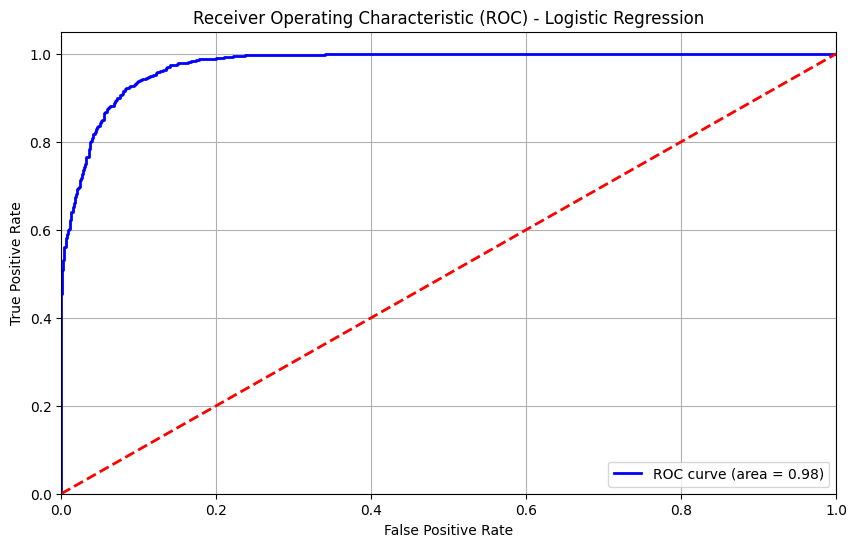

In [133]:
# Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_balanced, y_train_balanced)
y_pred_lr = model_lr.predict(X_test_balanced)
train_accuracy_lr = model_lr.score(X_train_balanced, y_train_balanced)
test_accuracy_lr = accuracy_score(y_test_balanced, y_pred_lr)
print(f'Logistic Regression Training Accuracy: {train_accuracy_lr:.2f}')
print(f'Logistic Regression Testing Accuracy: {test_accuracy_lr:.2f}')
y_prob_lr = model_lr.predict_proba(X_test_balanced)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_balanced, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [134]:
# ANN model
model_ann = MLPClassifier(random_state=42, max_iter=1000)
model_ann.fit(X_train_balanced, y_train_balanced)
y_pred_ann = model_ann.predict(X_test_balanced)

In [135]:
# Calculate training and testing accuracy
train_accuracy_ann = model_ann.score(X_train_balanced, y_train_balanced)
test_accuracy_ann = accuracy_score(y_test_balanced, y_pred_ann)
print(f'ANN Training Accuracy: {train_accuracy_ann:.2f}')
print(f'ANN Testing Accuracy: {test_accuracy_ann:.2f}')

ANN Training Accuracy: 0.96
ANN Testing Accuracy: 0.91


In [136]:
# Build the ANN model
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)))  # Input layer
model_ann.add(Dense(32, activation='relu'))  # Hidden layer
model_ann.add(Dense(1, activation='sigmoid'))  # Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=32, validation_split=0.2)
y_pred_ann = (model_ann.predict(X_test_balanced) > 0.5).astype(int)
accuracy_ann = accuracy_score(y_test_balanced, y_pred_ann)
print(f'ANN Accuracy: {accuracy_ann:.2f}')
print('ANN Classification Report:')
print(classification_report(y_test_balanced, y_pred_ann))
print('ANN Confusion Matrix:')
print(confusion_matrix(y_test_balanced, y_pred_ann))

Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7948 - loss: 0.4237 - val_accuracy: 0.9454 - val_loss: 0.1630
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9185 - loss: 0.1929 - val_accuracy: 0.9400 - val_loss: 0.1523
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9214 - loss: 0.1747 - val_accuracy: 0.9334 - val_loss: 0.1802
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9248 - loss: 0.1751 - val_accuracy: 0.9460 - val_loss: 0.1538
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9219 - loss: 0.1748 - val_accuracy: 0.9538 - val_loss: 0.1423
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9262 - loss: 0.1702 - val_accuracy: 0.9478 - val_loss: 0.1515
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9195 - loss: 0.1724 - val_accuracy: 0.9100 - val_loss: 0.2117
Epoch 8/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9239 - loss: 0.1716 - val_accuracy: 0.

Iteration 1, loss = 0.54537680
Iteration 2, loss = 0.34644781
Iteration 3, loss = 0.25534303
Iteration 4, loss = 0.21344206
Iteration 5, loss = 0.19551238
Iteration 6, loss = 0.18616675
Iteration 7, loss = 0.18115785
Iteration 8, loss = 0.17796654
Iteration 9, loss = 0.17567913
Iteration 10, loss = 0.17376551
Iteration 11, loss = 0.17283222
Iteration 12, loss = 0.17197613
Iteration 13, loss = 0.17180895
Iteration 14, loss = 0.17040383
Iteration 15, loss = 0.16945296
Iteration 16, loss = 0.16925892
Iteration 17, loss = 0.16853373
Iteration 18, loss = 0.16795678
Iteration 19, loss = 0.16730612
Iteration 20, loss = 0.16758036
Iteration 21, loss = 0.16659548
Iteration 22, loss = 0.16753014
Iteration 23, loss = 0.16623144
Iteration 24, loss = 0.16564706
Iteration 25, loss = 0.16524195
Iteration 26, loss = 0.16502675
Iteration 27, loss = 0.16492857
Iteration 28, loss = 0.16431626
Iteration 29, loss = 0.16400711
Iteration 30, loss = 0.16314710
Iteration 31, loss = 0.16299277
Iteration 32, los

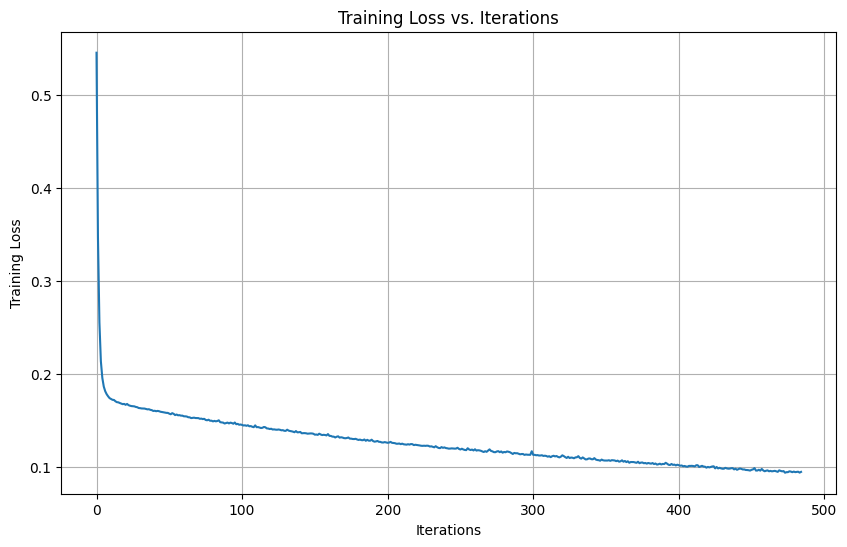

In [138]:
# ANN model with verbose
model_ann = MLPClassifier(random_state=42, max_iter=1000, verbose=True)
model_ann.fit(X_train_balanced, y_train_balanced)
plt.figure(figsize=(10, 6))
plt.plot(model_ann.loss_curve_)
plt.title('Training Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.grid()
plt.show()

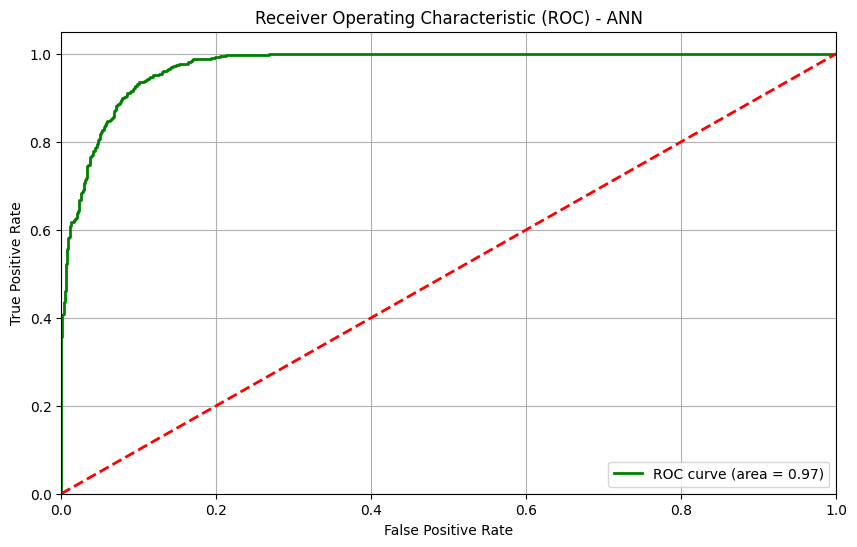

In [139]:
# Calculate ROC curve
y_prob_ann = model_ann.predict_proba(X_test_balanced)[:, 1]
fpr_ann, tpr_ann, _ = roc_curve(y_test_balanced, y_prob_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
plt.figure(figsize=(10, 6))
plt.plot(fpr_ann, tpr_ann, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_ann))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - ANN')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [140]:
# XGBoost model
model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = model_xgb.predict(X_test_balanced)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [141]:
# training and testing accuracy
train_accuracy_xgb = model_xgb.score(X_train_balanced, y_train_balanced)
test_accuracy_xgb = accuracy_score(y_test_balanced, y_pred_xgb)
print(f'XGBoost Training Accuracy: {train_accuracy_xgb:.2f}')
print(f'XGBoost Testing Accuracy: {test_accuracy_xgb:.2f}')

XGBoost Training Accuracy: 1.00
XGBoost Testing Accuracy: 0.93


In [142]:
# ROC curve and calculate AUC
y_prob_xgb = model_xgb.predict_proba(X_test_balanced)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_balanced, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

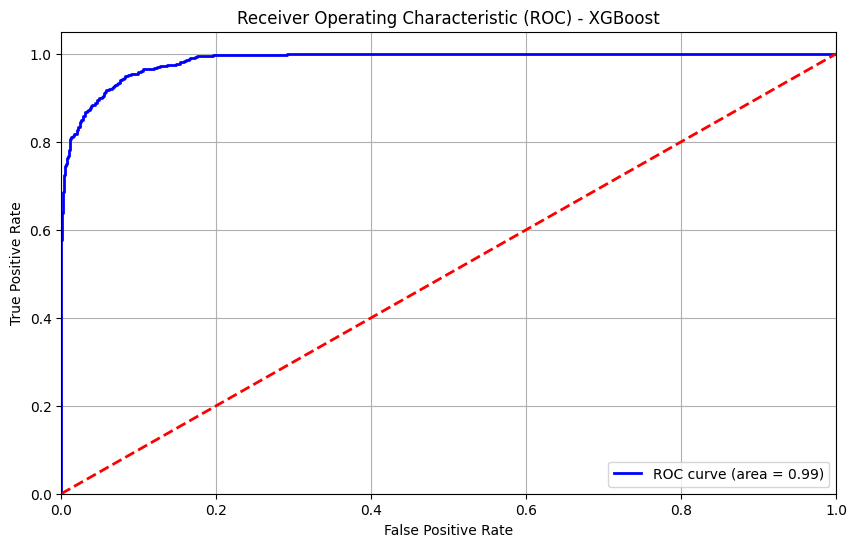

In [143]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()